# 0.6 Modele rozwoju epidemii
Ćwiczenie polega na dobieraniu parametrów modelu do danych doświadczalnych
dotyczących COVID-19. Dane można znaleźć m. in tu: https://ourworldindata.
org/coronavirus Każda osoba analizuje inny kraj (proszę to uzgodnić w grupie)

* na ocenę 3 - model Malthusa ( pasuje tylko do początku epidemii)
* na ocenę 4 model logistyczny (obejmuje wysycanie ale nie ozdrowienia)
* na ocenę 5 - porównanie modeli logistycznych Verhulst - Gompertz, lub
eksperymentalne dobieranie parametrów do modelu SIR


Fitowanie krzywej należy wykonać przy pomocy dowolnej biblioteki

Wybrany kraj: **Ukraina** - [Link do danych](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=earliest..2020-11-29&facet=none&pickerSort=asc&pickerMetric=location&Metric=Confirmed+cases&Interval=7-day+rolling+average&Relative+to+Population=true&Color+by+test+positivity=false&country=~UKR), przedział czasowy **od 08.03.2020 do 29.11.2020** 

Do wykonania zadania wykorzystam model logistyczny **Verhulsta**.



Text(0, 0.5, 'Infections')

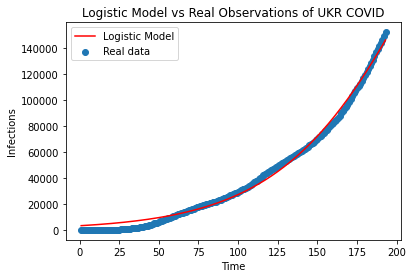

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import math
import scipy.optimize as optim
warnings.filterwarnings('ignore')

# import pliku
# plik został przeze mnie wyczyszczony ze zbędnych danych
data = pd.read_csv('/content/sample_data/start_covid_ukr.csv', sep=';')
data = data['total_cases']
data = data.reset_index(drop=False)
data.columns = ['Timestep', 'Total Cases']

# funkcje logistyczne
def my_logistic(t, a, b, c):
  return c / (1 + a * np.exp(-b*t))
def my_logistic2(t):
  return c / (1 + a * np.exp(-b*t))

# losowa inicjalizacja parametrów a, b i c
p0 = np.random.exponential(size=3)

#ustawienie górnych i dolnych ograniczeć dla a, b i c
bounds = (0, [100000., 3., 1000000000.])

# dopasowanie krzywej
x = np.array(data['Timestep']) + 1
y = np.array(data['Total Cases'])
(a,b,c),cov = optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)

# wykreślenie funkcji w porównaniu z rzeczywistymi danymi
plt.scatter(x, y)
plt.plot(x, my_logistic2(x), color="red")
plt.title('Logistic Model vs Real Observations of UKR COVID')
plt.legend(['Logistic Model', 'Real data'])
plt.xlabel('Time')
plt.ylabel('Infections')




## Podsumowanie:
Na podstawie powyższego wykresu widzimy, że udało się znaleźć funkcję logistyczną, bardzo zbliżoną do właściwych danych COVID z Ukrainy. 

#0.7 Automaty komórkowe
Zaprojektuj dwuwymiarowy automat komórkowy realizujący dowolny algorytm oparty na regułach sąsiedztwa.

### Snowflake:

In [ ]:
size = 10
def neigh():
  nearest=[[0 for _ in range(size)] for _ in range(size)]
  for y in range(size):
    for x in range(size):
      nearest[y][x] = count(y,x)
  return nearest

def count(y, x):
  dy=[0,0,1,-1]
  dx=[-1,1,0,0]
  count = 0
  for k in range(len(dx)):
    kx=(x+dx[k]) % size
    ky=(y+dy[k]) % size
    count=count+tab[ky][kx]
  return count
 
def inicialize(y,x):
  tab=[[0 for _ in range(y)] for _ in range(x)]
  tab[4][4]=1
  tab[4][5]=1
  return tab
 
def print_tab(tab):
  for y in range(size):
    for x in range(size):
      print(tab[x][y], end=' ')
    print(' ')

 
tab=inicialize(size,size)
print_tab(tab)
print('====================')
for x in range(size):
  nearest = neigh()
  res=tab
  for y in range(size):
      for x in range(size):
        if tab[y][x] == 0:
          if nearest[y][x]==1:
            res[y][x]=1
  tab=res
  print_tab(tab)
  print('====================')

0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 1 1 1 0 0 0 0  
0 0 0 1 1 1 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 1 1 1 1 1 0 0 0  
0 0 1 1 1 1 1 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 1 1 1 0 0 0 0  
0 0 1 0 1 0 1 0 0 0  
0 1 1 1 1 1 1 1 0 0  
0 1 1 1 1 1 1 1 0 0  
0 0 1 0 1 0 1 0 0 0  
0 0 0 1 1 1 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 0 1 0 0 0 0 0  
0 0 0 1 1 1 0 0 0 0  
0 0 1 0 1 0 1 0 0 0  
1 1 1 1 1 1 1 1 1 0  
1 1 1 1 1 

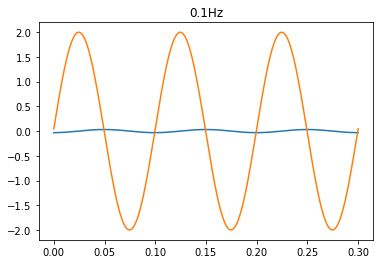

(0.031821476916925655, 1.9994268675722975)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
R = 1;
C = 0.696;
a = 1/(R*C)
A = 2
w1=(2*np.pi)/0.1
# 0.1Hz
t=np.linspace(0, 3*2*np.pi/w1, 300)
s1=A*(a*np.sin(w1*t)-w1*np.cos(w1*t))/(w1**2+a**2)
sd1=A*(a*w1*np.cos(w1*t)+w1**2*np.sin(w1*t))/(w1**2+a**2)
fig,ax=plt.subplots()
ax.set_title('0.1Hz')
ax.plot(t,s1,t,sd1)
plt.show()
max(s1),max(sd1)

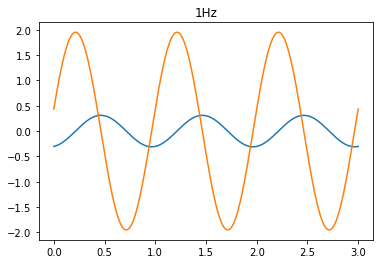

(0.3102977110969568, 1.9496737105622215)

In [ ]:
# 1Hz
w2=(2*np.pi)/1
t=np.linspace(0, 3*2*np.pi/w2, 300)
s2=A*(a*np.sin(w2*t)-w2*np.cos(w2*t))/(w2**2+a**2)
sd2=A*(a*w2*np.cos(w2*t)+w2*w2*np.sin(w2*t))/(w2**2+a**2)
fig,ax=plt.subplots()
ax.set_title('1Hz')
ax.plot(t,s2,t,sd2)
plt.show()
max(s2),max(sd2)

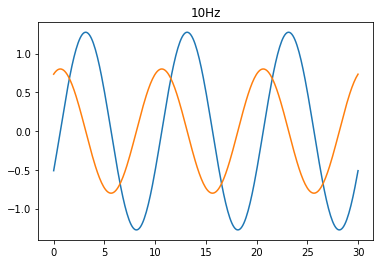

(1.2753420036175007, 0.8013191320412988)

In [ ]:
# 10Hz
w3=(2*np.pi)/10
t=np.linspace(0, 3*2*np.pi/w3, 300)
s3=A*(a*np.sin(w3*t)-w3*np.cos(w3*t))/(w3**2+a**2)
sd3=A*(a*w3*np.cos(w3*t)+w3*w3*np.sin(w3*t))/(w3**2+a**2)
fig,ax=plt.subplots()
ax.set_title('10Hz')
ax.plot(t,s3,t,sd3)
plt.show()
max(s3),max(sd3)

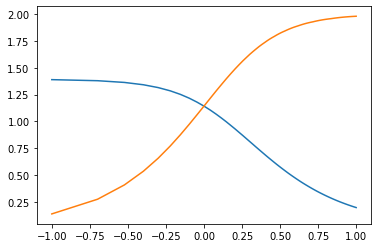

In [ ]:
logw = []
ss=[]
ssd=[]
ww=np.linspace(0.1,10,100)
for w in ww:
  t = np.linspace(0, 2 * np.pi / w, 100)
  s=A*(a*np.sin(w*t)-w*np.cos(w*t))/(w**2+a**2)
  sd=A*(a*w*np.cos(w*t)+w*w*np.sin(w*t))/(w**2+a**2)
  ss.append(max(s))
  ssd.append(max(sd))
  logw.append(np.log10(w))
fig,ax=plt.subplots()
ax.plot(logw,ss,logw,ssd)
plt.show()